# PRODUCT SALES ANALYSIS

### 📝 Project Objectives

The project report will include codes, comments and visuals of the following:
- 1. **Data Validation**:   
  - Validating and cleaning steps for every column in the data 

<br>

- 2. **Exploratory Data Analysis**:  
  - Using two different graphics showing single variables only to demonstrate the characteristics of data  
  - using at least one graphic showing two or more variables to represent the relationship between features
  - Describing my findings

<br>

- 3. **Definition of a metric for the business to monitor** (README.md file)
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data

<br>

- 4. **Final Summary** (README.md file)
    - Including recommendations that the business should undertake 

### 1. DATA VALIDATION

In [1]:
# Loading the dataset into the pandas DataFrame
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('product_sales.csv')

# Checking the dataset
data.head()


,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [2]:
# Checking for the number of columns and rows
num_rows, num_cols = data.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 15000
Number of columns: 8


In [3]:
# Showing all the columns present in the dataframe
print(data.columns.tolist())

['week', 'sales_method', 'customer_id', 'nb_sold', 'revenue', 'years_as_customer', 'nb_site_visits', 'state']


In [4]:
# Checking the dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [5]:
# Checking the statistics of the dataset
data.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,15000.000000,15000.000000,13926.000000,15000.000000,15000.000000
mean,3.098267,10.084667,93.934943,4.965933,24.990867
std,1.656420,1.812213,47.435312,5.044952,3.500914
min,1.000000,7.000000,32.540000,0.000000,12.000000
25%,2.000000,9.000000,52.470000,1.000000,23.000000
50%,3.000000,10.000000,89.500000,3.000000,25.000000
75%,5.000000,11.000000,107.327500,7.000000,27.000000
max,6.000000,16.000000,238.320000,63.000000,41.000000


In [6]:
# Get the list of column names
column_names = data.columns

# Iterate over each column
for column in column_names:
    # Display the unique values in each of the column
    unique_values = data[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print()

Unique values in column 'week':
[2 6 5 4 3 1]

Unique values in column 'sales_method':
['Email' 'Email + Call' 'Call' 'em + call' 'email']

Unique values in column 'customer_id':
['2e72d641-95ac-497b-bbf8-4861764a7097'
 '3998a98d-70f5-44f7-942e-789bb8ad2fe7'
 'd1de9884-8059-4065-b10f-86eef57e4a44' ...
 '839653cb-68c9-48cb-a097-0a5a3b2b298b'
 'e4dad70a-b23b-407c-8bd3-e32ea00fae17'
 '4e077235-7c17-4054-9997-7a890336a214']

Unique values in column 'nb_sold':
[10 15 11  9 13  8 12  7 14 16]

Unique values in column 'revenue':
[   nan 225.47  52.55 ...  44.34  45.01  64.9 ]

Unique values in column 'years_as_customer':
[ 0  1  6  3 10  9  7  4  2 20  8  5 17 36 15 14 19 13 12 11 30 24 22 18
 26 23 32 16 39 25 33 21 31 27 34 28 29 35 38 37 63 47]

Unique values in column 'nb_site_visits':
[24 28 26 25 22 31 23 30 21 27 32 29 20 18 19 35 16 17 33 36 34 15 37 14
 13 12 41]

Unique values in column 'state':
['Arizona' 'Kansas' 'Wisconsin' 'Indiana' 'Illinois' 'Mississippi'
 'Georgia' 'Oklahoma'

In [7]:
# Replace "em + call" with "Email + Call"
data['sales_method'] = data['sales_method'].replace('em + call', 'Email + Call')

# Replace "email" with "Email"
data['sales_method'] = data['sales_method'].replace('email', 'Email')

# Checking the dataframe again for the "sales_method" column
print(data['sales_method'].unique())

['Email' 'Email + Call' 'Call']


In [8]:
# Replacing the null values inside column "revenue" to 0 (integer)
data["revenue"] = data["revenue"].fillna(0).astype(float)

# Checking the dataset info again for column "revenue"
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            15000 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [9]:
# Replacing the outliers (39, 47 and 63 years) specific values in the "years_as_customer" column with 38 years (maximum number of years)
data['years_as_customer'].replace([39, 47, 63], 38, inplace=True)

# Verify the updated values
print(data['years_as_customer'].unique())

[ 0  1  6  3 10  9  7  4  2 20  8  5 17 36 15 14 19 13 12 11 30 24 22 18
 26 23 32 16 38 25 33 21 31 27 34 28 29 35 37]


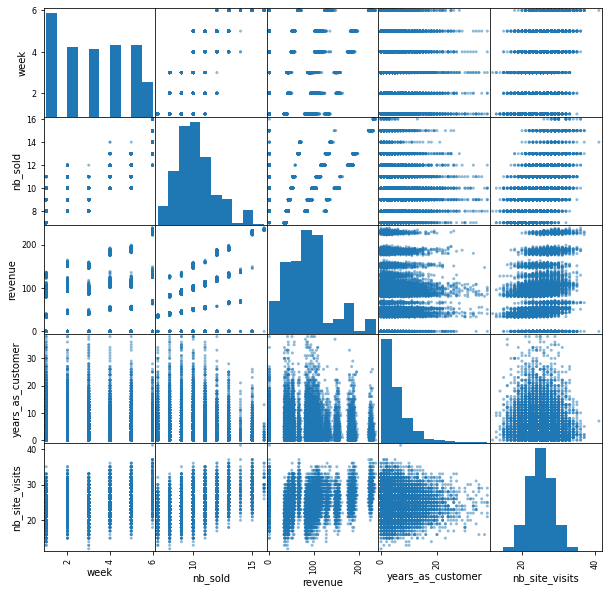

In [10]:
# Create a scatter matrix plot of all variables
pd.plotting.scatter_matrix(data, figsize=(10,10), diagonal='hist')

# Show the plot
plt.show()

### 2a. EXPLORATORY ANALYSIS - Single Variable Graphics

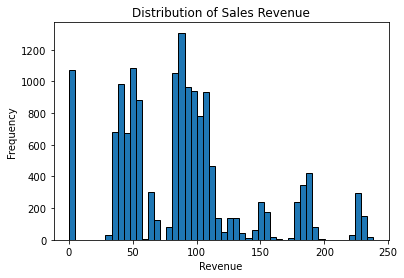

In [11]:
# Distribution of Sales Revenue chart
# Create a histogram of the 'revenue' column
plt.hist(data['revenue'], bins=50, edgecolor='black')

# Set the title and axis labels
plt.title('Distribution of Sales Revenue')
plt.xlabel('Revenue')
plt.ylabel('Frequency')

# Show the plot
plt.show()


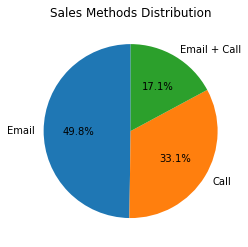

In [12]:
# Sales Method Distribution
# Create a pie chart of the 'sales_method' column
sales_method_counts = data['sales_method'].value_counts()
plt.pie(sales_method_counts, labels=sales_method_counts.index, autopct='%1.1f%%', startangle=90)

# Set the title
plt.title('Sales Methods Distribution')

# Show the plot
plt.show()

### 2b. EXPLORATORY ANALYSIS - Two or More Variable Graphics

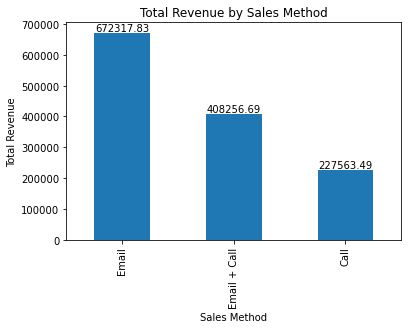

In [13]:
# Import the necessary libraries
import matplotlib.pyplot as plt

# Group the data by sales method and calculate the total revenue for each group
revenue_by_method = data.groupby('sales_method')['revenue'].sum()

# Sort the data by revenue in descending order
revenue_by_method = revenue_by_method.sort_values(ascending=False)

# Create a bar chart of the total revenue for each sales method
revenue_by_method.plot(kind='bar')

# Set the labels and title for the chart
plt.xlabel('Sales Method')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Sales Method')

# Add labels to the bars
for i, v in enumerate(revenue_by_method):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Display the chart
plt.show()

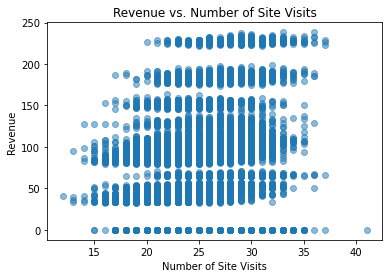

In [14]:
# 2 Variables Graphics 
# Create a scatter plot of the number of site visits vs. revenue
plt.scatter(data['nb_site_visits'], data['revenue'], alpha=0.5)
plt.xlabel('Number of Site Visits')
plt.ylabel('Revenue')
plt.title('Revenue vs. Number of Site Visits')
plt.show()

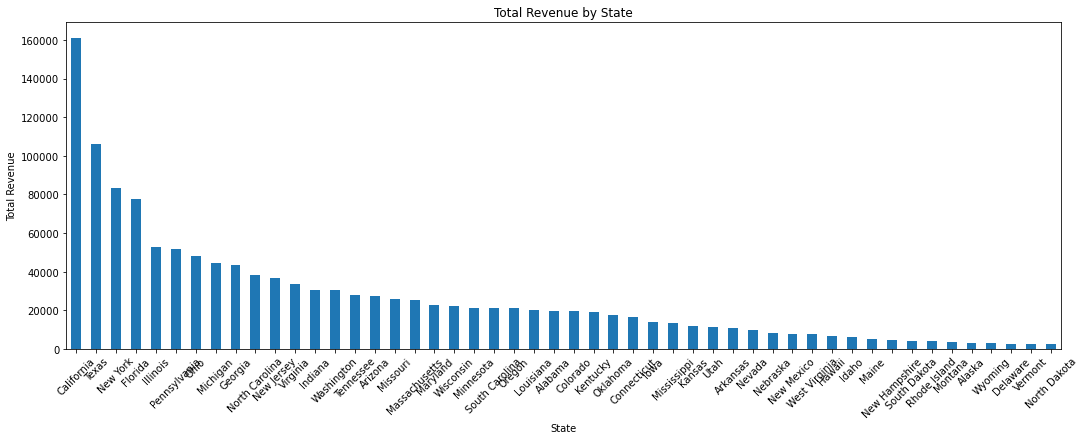

In [15]:
# Import the necessary libraries
import matplotlib.pyplot as plt

# Group the data by state and calculate the total revenue for each group
revenue_by_state = data.groupby('state')['revenue'].sum()

# Sort the data by revenue in descending order
revenue_by_state = revenue_by_state.sort_values(ascending=False)

# Set the figure size to accommodate the longer x-axis labels
plt.figure(figsize=(15, 6))

# Create a bar chart of the total revenue for each state
revenue_by_state.plot(kind='bar')

# Set the x-axis label rotation for better readability
plt.xticks(rotation=45)

# Adjust the spacing between the bars
plt.tight_layout()

# Set the labels and title for the chart
plt.xlabel('State')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by State')

# Display the chart
plt.show()

The README.md file details the:

3. **Definition of a metric for the business to monitor**

4. **Final Summary**